## Learn computer vision fundamentals with the famous MNIST data

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [104]:
PATH = 'E:/AXEL/UPEM/Compétences/Kaggle/Digit Recognizer/'
df_train = pd.read_csv(PATH + 'train.csv')
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
df_test = pd.read_csv(PATH + 'test.csv')
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [107]:
np.sort(df_train['pixel774'].unique())

array([  0,   3,   6,  17,  18,  19,  20,  27,  28,  30,  36,  38,  41,
        43,  44,  49,  60,  61,  63,  75,  79,  80,  82,  84,  89,  95,
        97,  98,  99, 105, 108, 111, 117, 122, 125, 128, 129, 135, 151,
       157, 183, 190, 191, 192, 194, 204, 212, 213, 218, 223, 226, 234,
       247, 249, 252, 253, 254], dtype=int64)

## Data preparation

In [108]:
print(f"Number of NaN in train dataset:{df_train.isna().sum().sum(axis=0)}")
print(f"Number of NaN in test dataset :{df_test.isna().sum().sum(axis=0)}")

Number of NaN in train dataset:0
Number of NaN in test dataset :0


In [109]:
X_train = df_train.drop('label', axis = 1) # features
y_train = df_train['label'] # target

y_label_int = y_train.copy()

print(f" X_train :{X_train.shape}")
print(f" y_train :{y_train.shape}")

 X_train :(42000, 784)
 y_train :(42000,)


In [110]:
y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

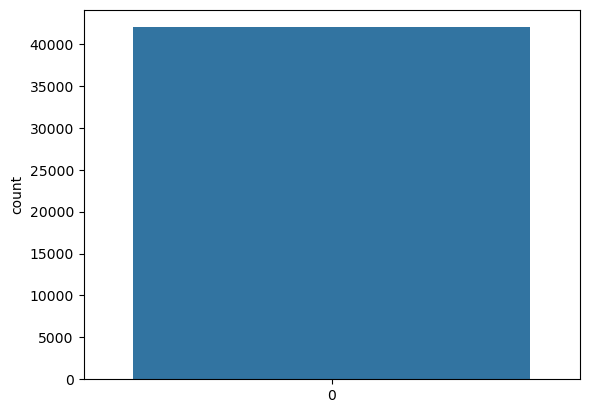

In [111]:
sns.countplot(y_train);

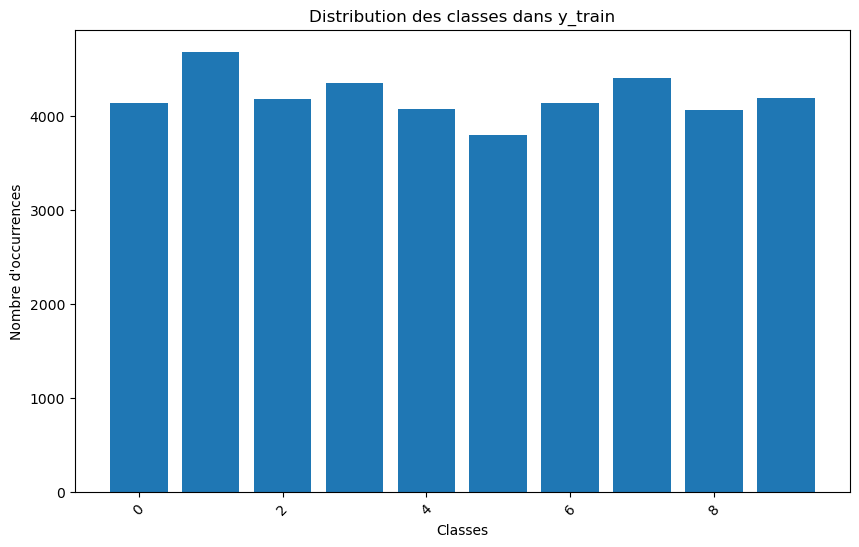

In [112]:
plt.figure(figsize=(10, 6)) 
plt.bar(y_train.value_counts().index, y_train.value_counts().values)
plt.xlabel('Classes') 
plt.ylabel('Nombre d\'occurrences')
plt.title('Distribution des classes dans y_train')
plt.xticks(rotation=45) 
plt.show()

In [113]:
# Normalization  Data [0..255] -> data [0..1].

X_train=X_train / 255
df_test=df_test / 255

In [114]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1). We reshape all data to 28x28x1 3D matrices

X_train = X_train.values.reshape(-1,28,28,1)
df_test = df_test.values.reshape(-1,28,28,1)
print("x_train : ",X_train.shape)
print("test : ",df_test.shape)


x_train :  (42000, 28, 28, 1)
test :  (28000, 28, 28, 1)


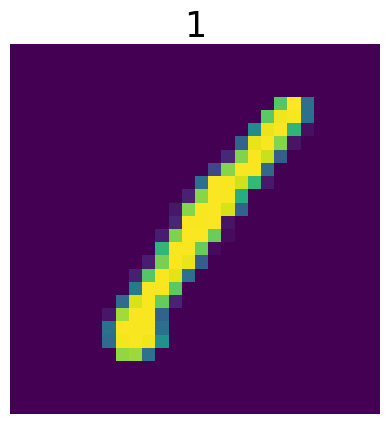

In [115]:
# First image from the training set

plt.imshow(X_train[0][:,:,0]);
plt.axis('off') 
plt.title(str(int(y_label_int[0])), color= 'black', fontsize=25)
plt.show()

In [116]:
# Label Encoding 
from keras.utils import to_categorical # convert to one-hot-encoding

y_train  = to_categorical(y_train , num_classes = 10) # 9 -> [0,....,0,0,1] and 0 -> [1,0,...0]
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [117]:
y_train.shape

(42000, 10)

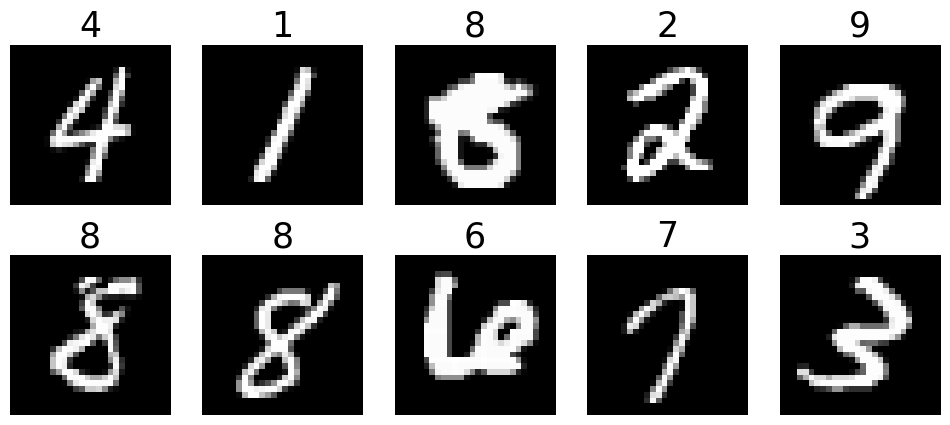

In [118]:
# randomly choose 10 samples from the training set and visualize it

fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,42000,size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i],:], cmap='gray')
    axes[i].axis('off') 
    axes[i].set_title(str(int(y_label_int[idx[i]])), color= 'black', fontsize=25)
plt.show()

## Deep Learning : CNN (Convolutionnal)

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
# Split train and validation set

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state=94)
print("X_train :",X_train.shape)
print("X_valid :",X_valid.shape)
print("y_train :",y_train.shape)
print("y_valid :",y_valid.shape)

X_train : (33600, 28, 28, 1)
X_valid : (8400, 28, 28, 1)
y_train : (33600, 10)
y_valid : (8400, 10)


In [121]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (5,5), activation="relu", padding="same", input_shape=(28, 28, 1)),
    keras.layers.Conv2D(32, (5,5), activation="relu", padding="same",),
    keras.layers.MaxPooling2D(2, padding="valid"),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2, padding="valid"),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2, padding="valid"),
    
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")
])

In [122]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

In [123]:
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate = 0.03), metrics=["accuracy"])

In [124]:
history = model.fit(X_train, y_train, epochs=25, batch_size=42, validation_data=(X_valid,y_valid), verbose=1,
                    callbacks = keras.callbacks.ModelCheckpoint("best_model2.keras",save_best_only = True))

Epoch 1/25
800/800 [==============================] - 76s 93ms/step - loss: 1.0273 - accuracy: 0.6390 - val_loss: 0.1552 - val_accuracy: 0.9544
Epoch 2/25
800/800 [==============================] - 74s 93ms/step - loss: 0.2073 - accuracy: 0.9375 - val_loss: 0.0893 - val_accuracy: 0.9719
Epoch 3/25
800/800 [==============================] - 72s 90ms/step - loss: 0.1397 - accuracy: 0.9581 - val_loss: 0.0737 - val_accuracy: 0.9776
Epoch 4/25
800/800 [==============================] - 75s 94ms/step - loss: 0.1112 - accuracy: 0.9657 - val_loss: 0.0602 - val_accuracy: 0.9821
Epoch 5/25
800/800 [==============================] - 75s 93ms/step - loss: 0.0935 - accuracy: 0.9710 - val_loss: 0.0519 - val_accuracy: 0.9846
Epoch 6/25
800/800 [==============================] - 73s 92ms/step - loss: 0.0829 - accuracy: 0.9747 - val_loss: 0.0466 - val_accuracy: 0.9867
Epoch 7/25
800/800 [==============================] - 76s 95ms/step - loss: 0.0736 - accuracy: 0.9771 - val_loss: 0.0480 - val_accuracy:

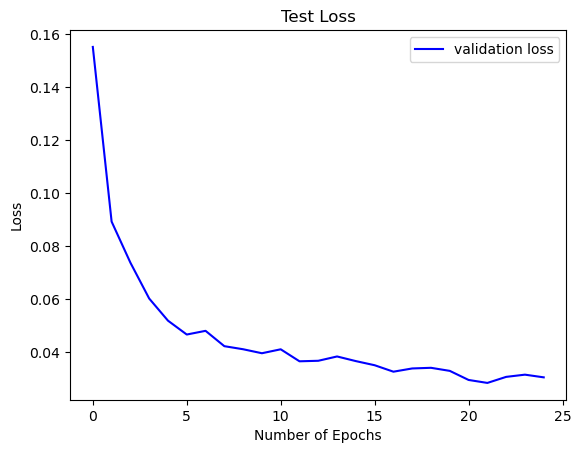

In [159]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

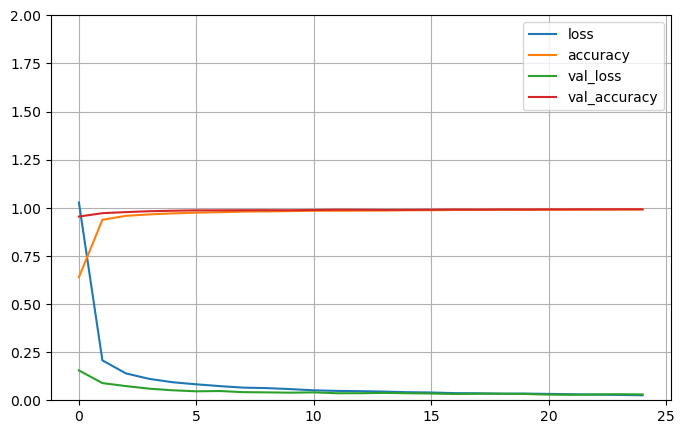

In [125]:
# Plot the loss and accuracy curves for training and validation 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

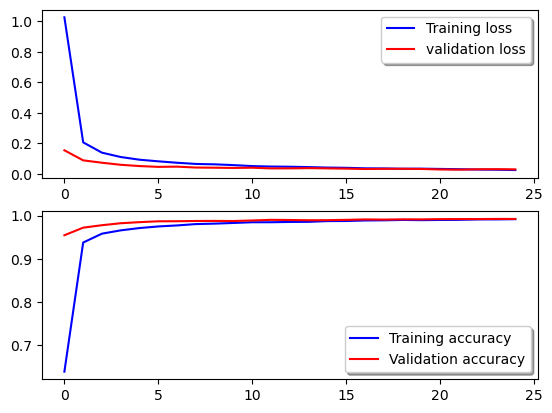

In [126]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [168]:
# Predict the values from the validation dataset
y_pred_vect = model.predict(X_valid)
y_pred = np.argmax(y_pred_vect,axis = 1) # return index '1'
y_pred

263/263 [==============================] - 6s 21ms/step


array([4, 5, 1, ..., 8, 3, 7], dtype=int64)

In [170]:
y_true = np.argmax(y_valid,axis = 1) 
errors = (y_pred - y_true != 0) #create tab boolean

In [179]:
errors_index = np.where(errors)[0]
errors_index.shape

(67,)

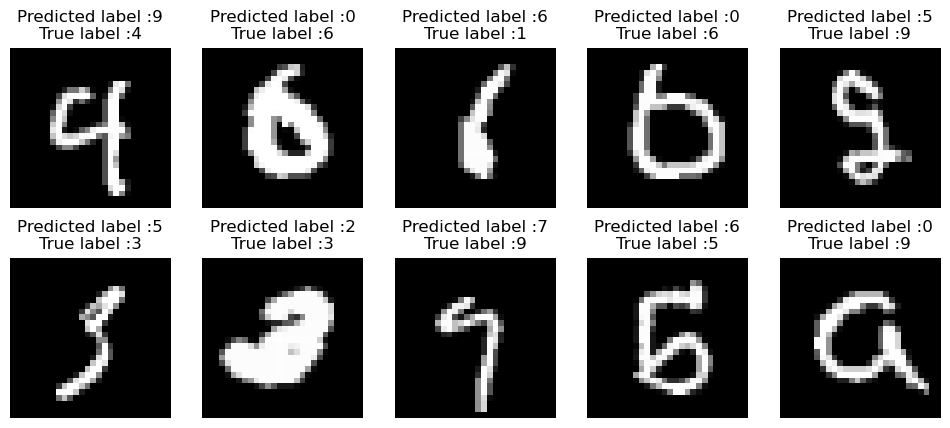

In [198]:
# randomly choose 10 samples errors

import random

fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = random.sample(errors_index.tolist(),10)
for i in range(10):
    axes[i].imshow(X_valid[idx[i],:], cmap='gray')
    axes[i].axis('off') 
    axes[i].set_title("Predicted label :{}\nTrue label :{}".format(y_pred[idx[i]],y_true[idx[i]]))
plt.show()

## Predictions for testing data

In [156]:
predict_vect = model.predict(df_test)
predict = np.argmax(results_vect,axis = 1) 
predict

875/875 [==============================] - 19s 21ms/step


array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [157]:
submission = pd.read_csv(PATH + 'sample_submission.csv')
submission ['Label'] = predict
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [158]:
submission.to_csv('submission.csv', index=False)